### **Decision Tree**
- Non-linearly(handle non-linear data) separable algorithm.
- work on conditional statements.

In [1]:
from IPython.display import Image

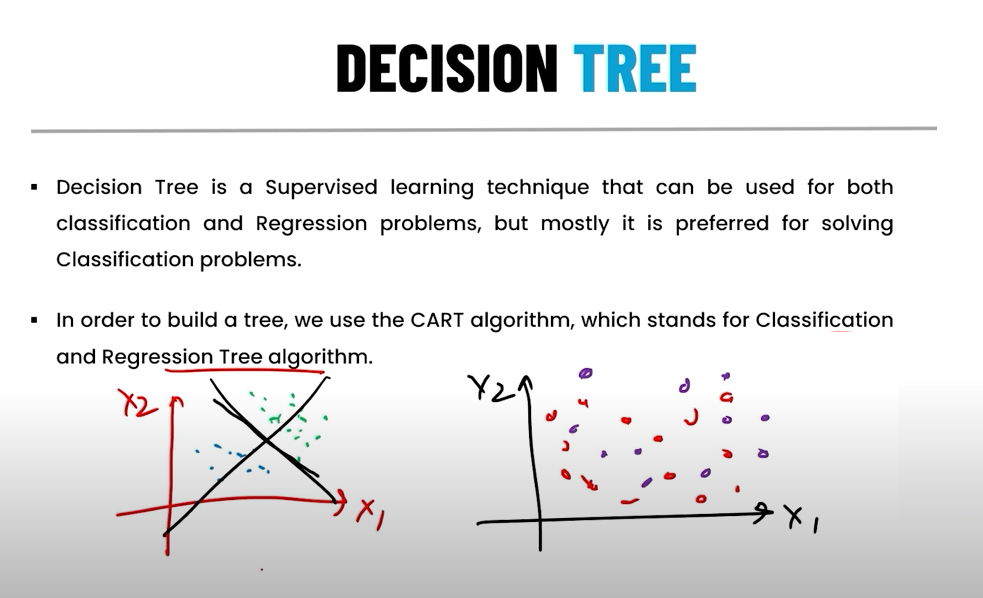

In [4]:
Image(filename="decision Tree.png", width=600, height=400)

### Workin of Decision Trees

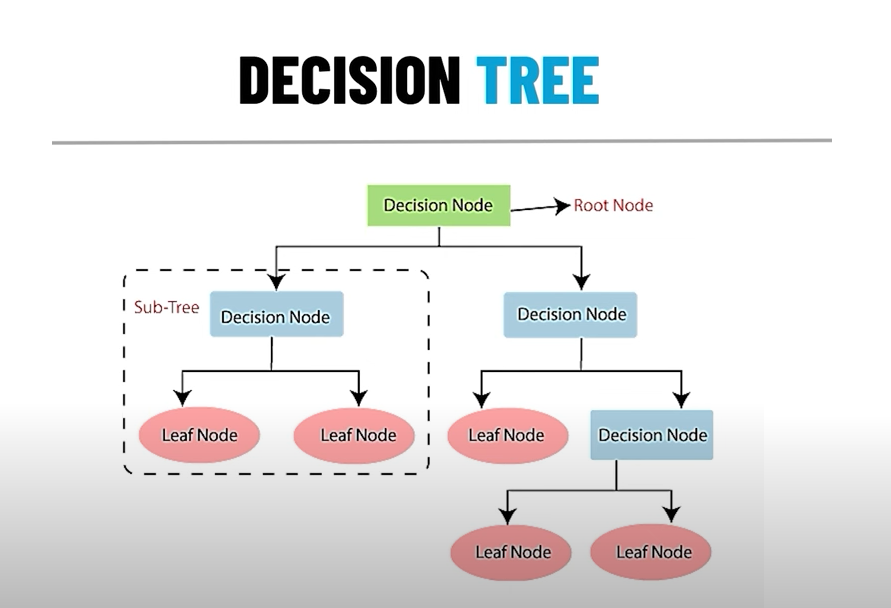

In [7]:
Image(filename="working of decision tree.png", width=500, height=300)

### **Types of Decision Trees**
### **1. ID3:**
- used for **classification**
- ID3 stands for Iterative Dichotomiser 3. 
- It’s an algorithm developed by Ross Quinlan in the 1980s
- create decision trees based on Information Gain as the splitting criterion.
- make multi-way splitting. 
- Works with categorical data not continous data.
- Does not handle missing values,
- Does not perform pruning, which can lead to overfitting (making the tree complex and specific to the training data).
- Typically creates univariate trees (single-path splits) and may not perform well with very large datasets.


### **2. C4.5 :**
- used for **classification**
- Improvement to ID3 and is named as a version number, where "C" simply represents "classifier."
- It’s also developed by Ross Quinlan.
- Uses Gain Ratio, which is an improvement over Information Gain.
- make multi-way splitting. 
- work with both categorical and continuous data.
- handle missing values by estimating the probabilities of each possible value based on the known data.
- Uses post-pruning, which removes branches that do not improve accuracy. 
- creates univariate trees, Can generate rules from the decision tree, allowing the model to be converted into a set of if-else rules, which is easier for interpretation.

### **CART:**
- Classification and regression tree.
- split a decision node into two nodes(binary splitting.)
    - binary splits (two branches at each node), regardless of the number of categories
    - can handle continuous and categorical data.
    - can create multivariate splits by combining multiple features ( figure multivariate decision tree.png) but splitting binary he kry ga.
    - includes cost-complexity pruning,
    - both **classification and regression**
    - uses **Gini Impurity (for classification)** or **Mean Squared Error (for regression)**


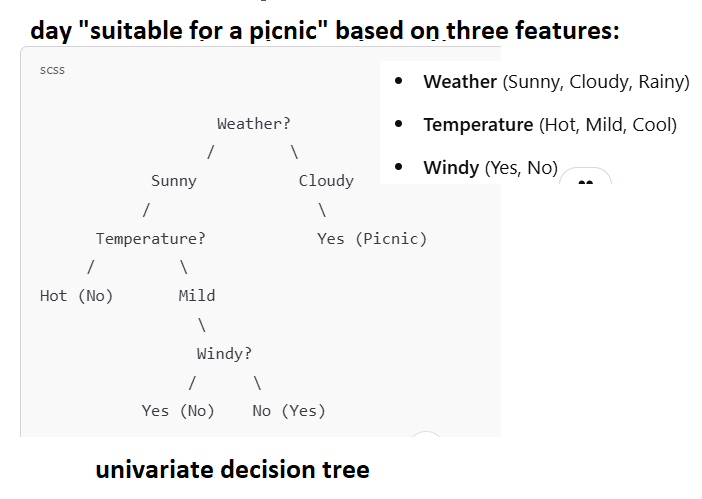

In [5]:
Image(filename="univariate decision trees.PNG", width=400, height=300)

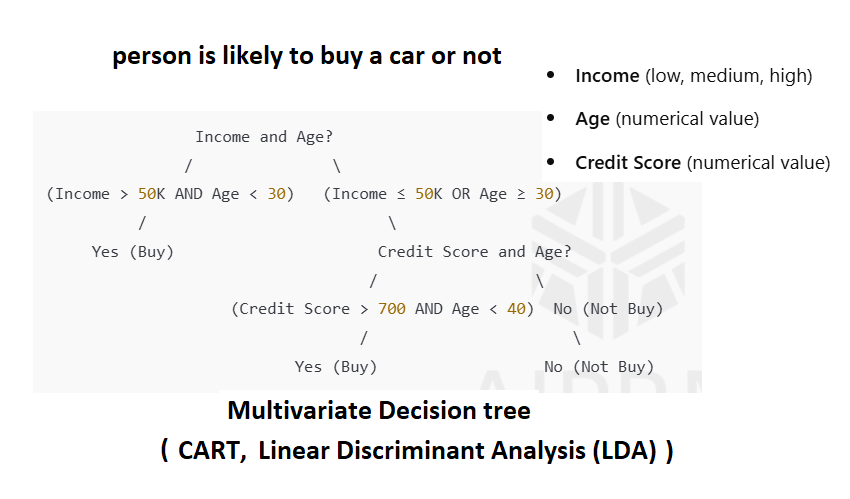

In [9]:
Image(filename="multivariate decision tree.png" , width=600, height=300)

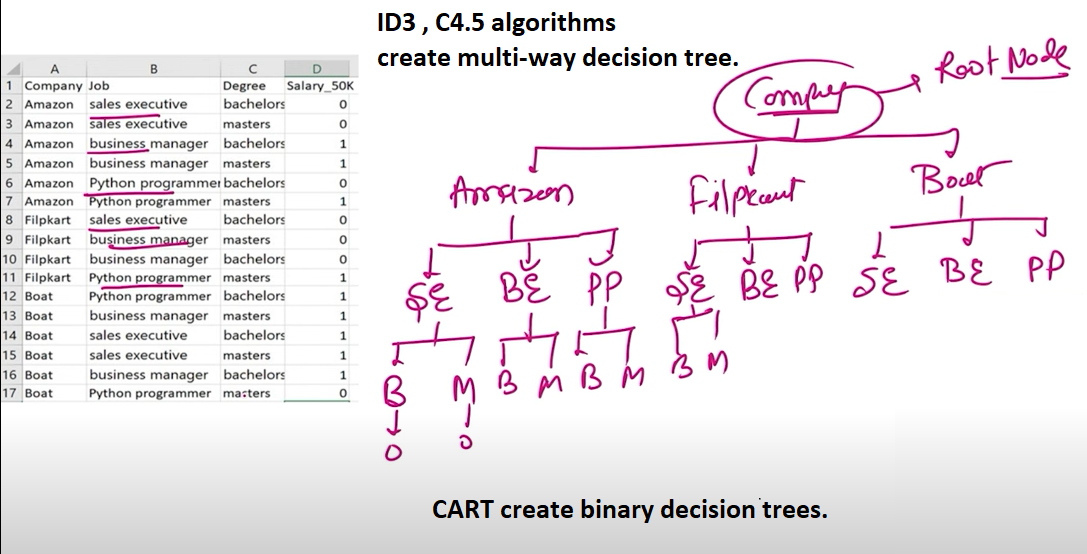

In [10]:
Image(filename="make tree for data.png")

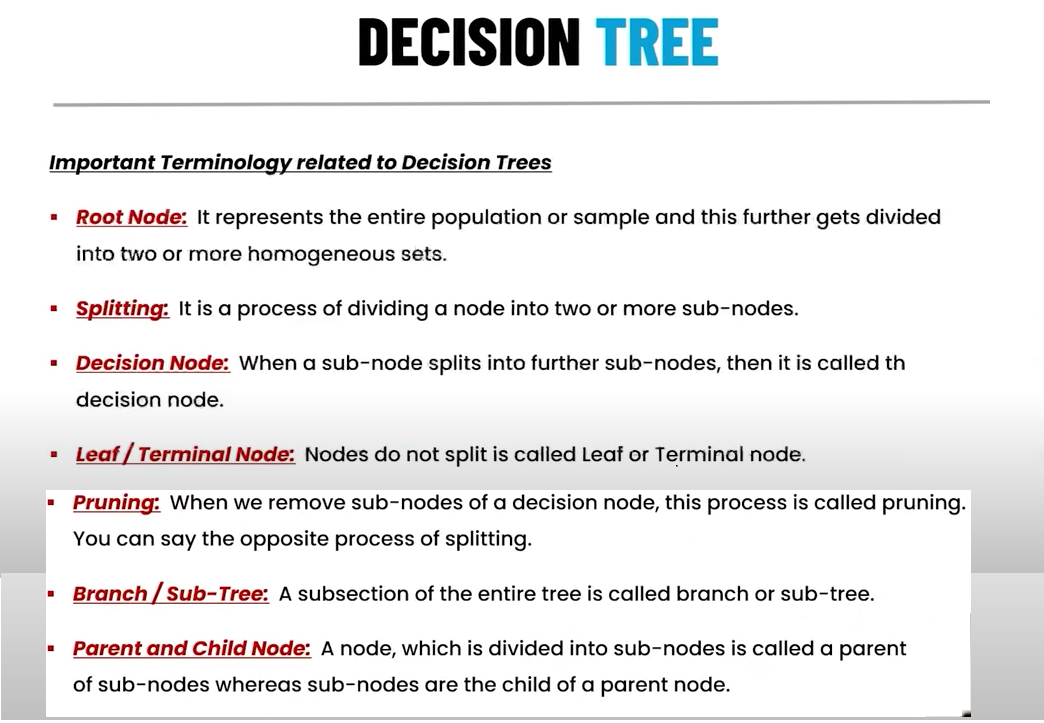

In [14]:
Image(filename="decision tree terminologies.png", width=600,height=400)

### Next question is that why we choose company as root node. 

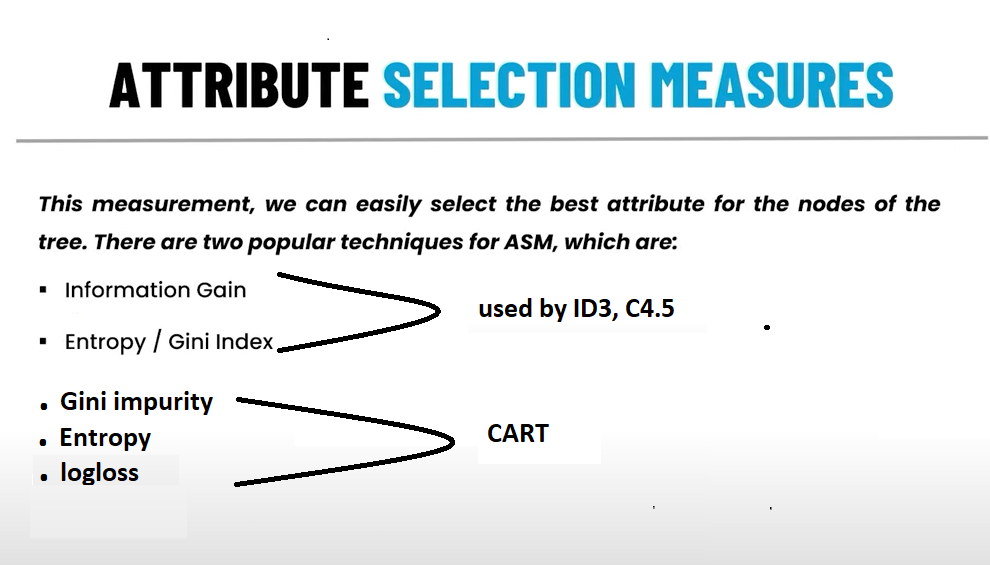

In [105]:
Image(filename="attribute selection for decision tree.png", width=600, height=400)

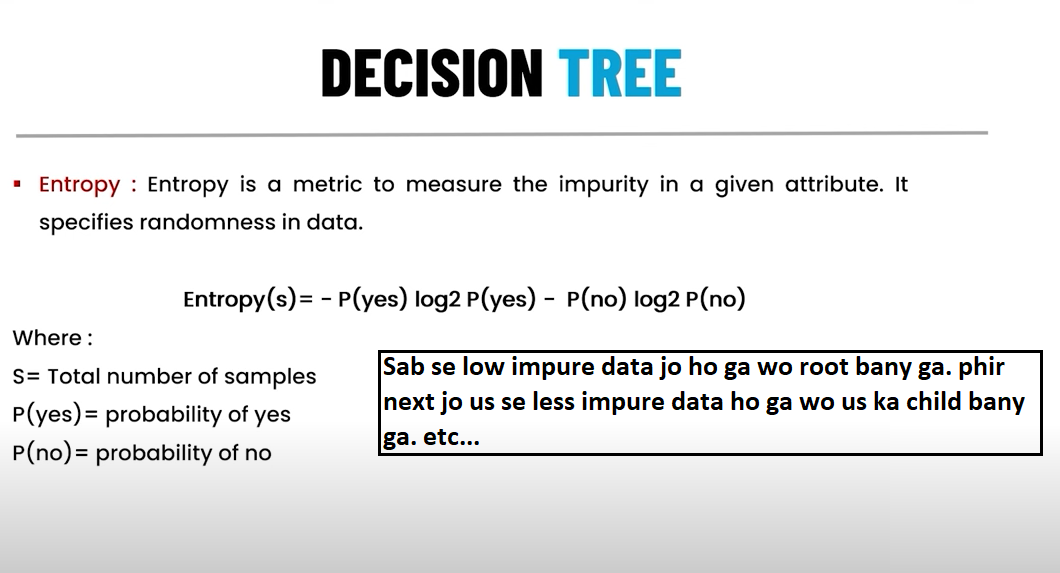

In [19]:

Image(filename="decision tree entropy.png", width=600, height=400)

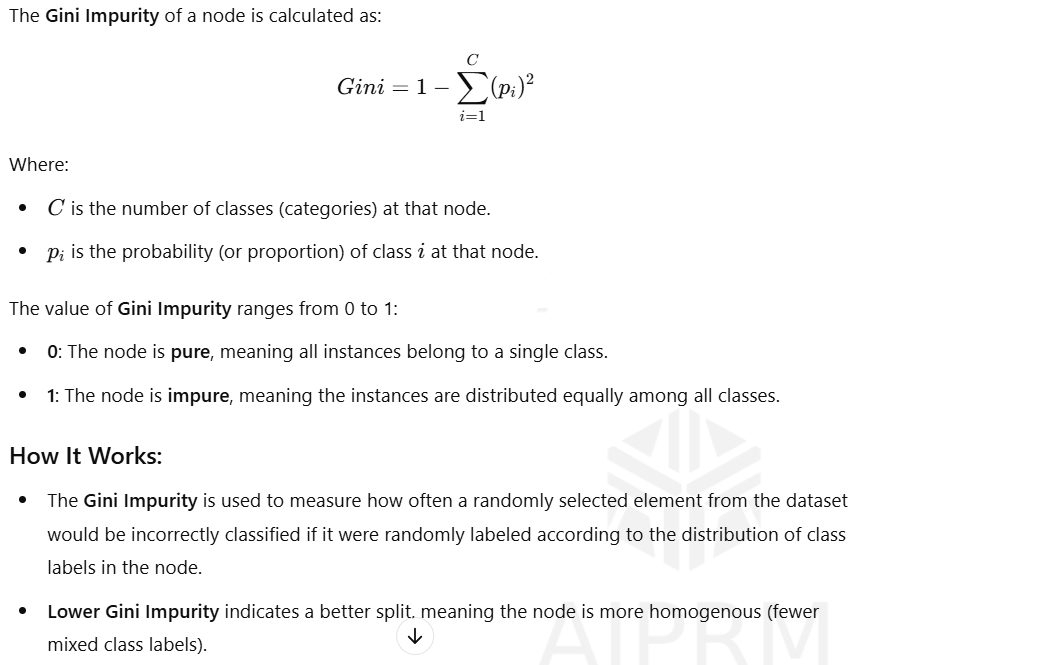

In [15]:
Image(filename="Gini impurity.png", width=700,height=400)

### step1: importing required libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # CART
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

### step2:

In [2]:
ds = pd.read_csv("Social_Network_Ads.csv")
ds.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
ds.shape

(400, 3)

### step3:

In [ ]:
ds.isnull().sum()

### step4:

In [ ]:
ds.describe()

### step 5:

In [ ]:
# checking outliers ( no need here, its just for my own knowledge)
sns.boxplot(x="EstimatedSalary" ,data=ds)

In [ ]:
# outliers detection ( no need here, its just for my own knowledge)
sns.distplot(ds["Age"])

In [ ]:
# outliers detection ( no need here, its just for my own knowledge)
sns.distplot(ds["EstimatedSalary"])

In [ ]:
sns.kdeplot(ds["EstimatedSalary"])

### step 6:

In [ ]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=ds , hue='Purchased')

### step 7: separate independant and dependant variables

In [ ]:
# input and output features
x = ds[["Age", "EstimatedSalary"]]
y = ds["Purchased"]         # y = ds["Purchased"]

### Step 8: Feature Scalling

In [ ]:
# from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x), columns=x.columns)

### Step 9: training and testing data

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20, random_state=90)

### Step 10: train model

In [16]:
# from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [ ]:
# dtc1 = DecisionTreeClassifier(criterion="entropy")

In [17]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

### Step 11: checking score of model

In [18]:
dtc.score(x_test,y_test)*100

90.0

In [ ]:
# random state=42  83.75
# random state=70  85
# random state=90  90
# random state=100  83.75


### Step 12: check our tree

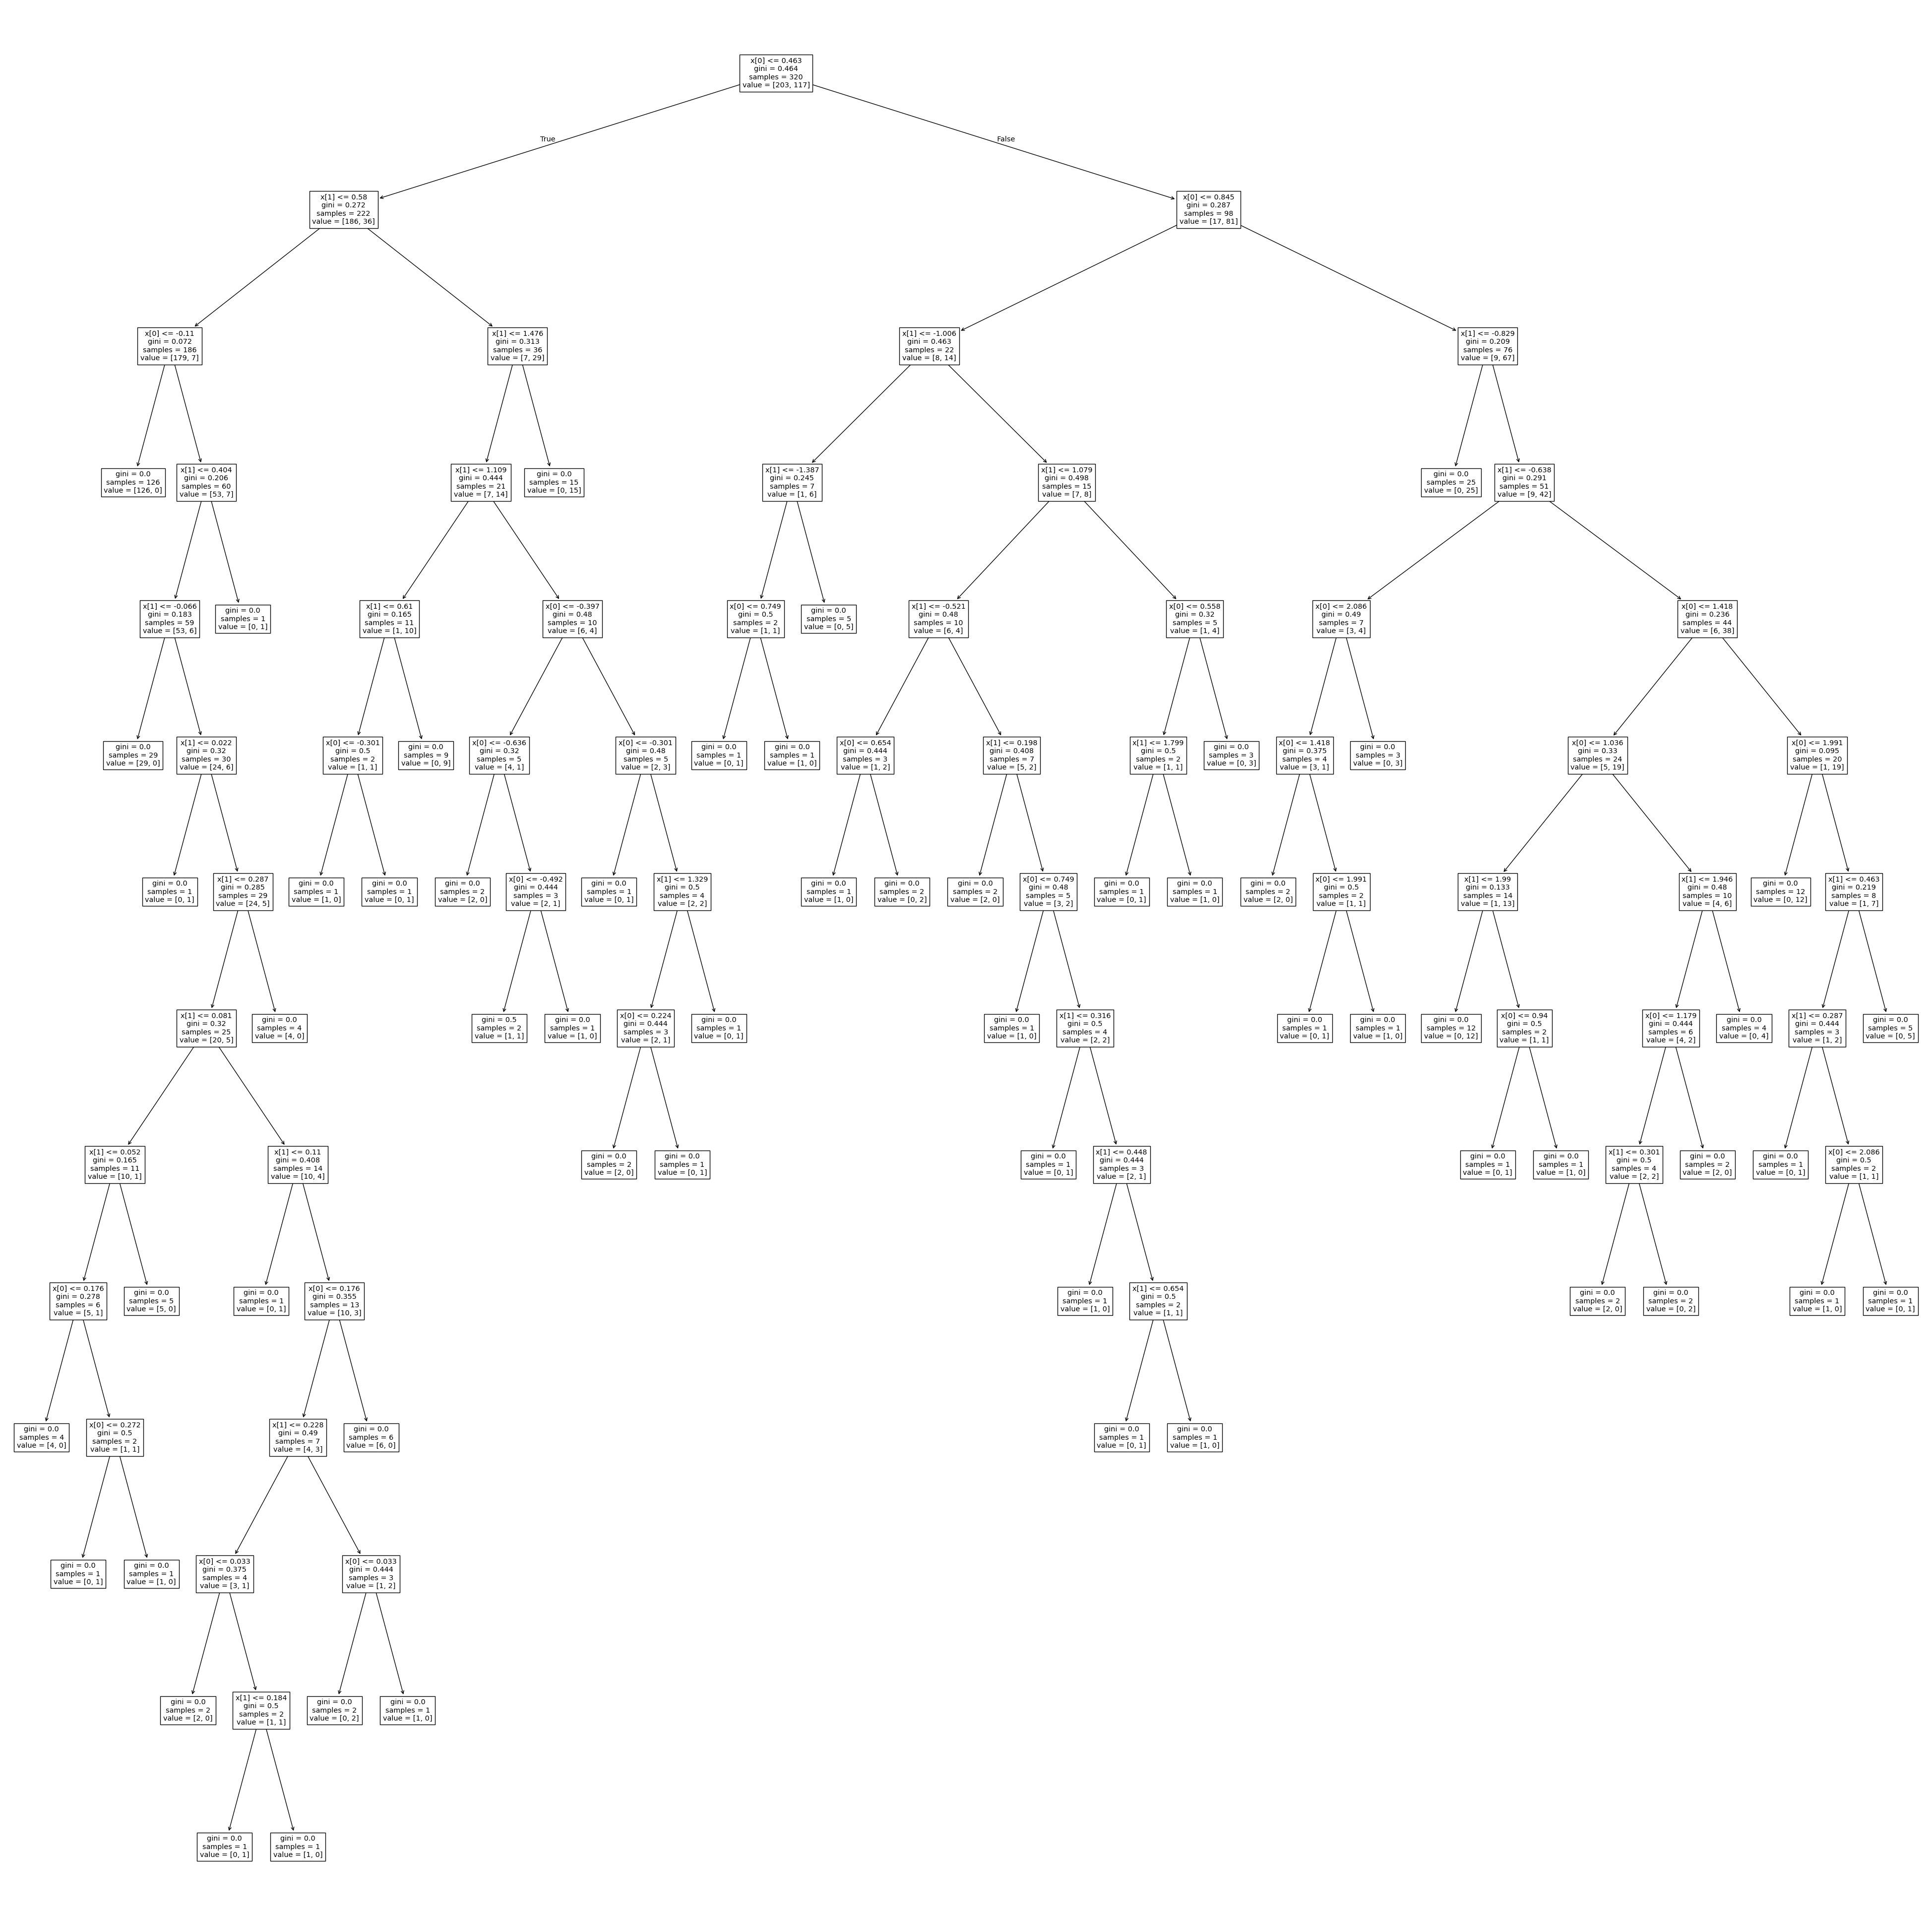

In [23]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
plot_tree(dtc)
plt.savefig("DTC.png")
plt.show()

### Step 13: plotting decision boundary

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.to_numpy(),y.to_numpy(), clf=dtc)


# Pruning of Tree
    - use pruning to avoid overfitting.
**Overfitting** 
- in decision trees occurs when the tree model learns the training data too well, capturing noise or fluctuations in the data rather than the actual underlying patterns. This results in a model that performs well on the training data but poorly on new, unseen data (i.e., it fails to generalize).

**Symptoms of Overfitting**

- High accuracy on training data but low accuracy on validation or test data.
- A very deep tree with many branches and nodes.

# **Pruning ways:**

**1. Pre Pruning:**
- model bnany se pehly he pruning k dety hyn.

**2. Post Pruning:**
- pehly model train krty hyn or phr is train k during he diferent different level hum pruning ko dety rehty hyn or hmari
pruning hoti rehti hy. and then final result humy dekhny ko milta hy.

**3. Setting Constraints:**
- Parameters like max_depth, min_samples_split, and min_samples_leaf in tree-based models help limit the tree’s complexity.

## Step 14: Checking Model Overfitted or Not:
    - Model give high acccuracy on training data and low on new data.

In [21]:
# accuracy on training data
dtc.score(x_train, y_train)*100

99.6875

In [22]:
# accuracy on test data
dtc.score(x_test, y_test)*100

90.0

### Step 15: Pre Pruning
- max_depth property help to do this. we will give value in integer which represent the levels.

In [ ]:
dtc = DecisionTreeClassifier(max_depth=5)   # max_depth =5 mean i need 5 levels
dtc.fit(x_train, y_train)
result = dtc.score(x_test,y_test)*100
print(f"Accuracy of Decision Tree Model on\n\ttest data : {result}")
print(f"\ttrain data : {dtc.score(x_train, y_train)*100}")

if we at above results then we may see that accracy has been improved. 

In [ ]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
plot_tree(dtc)
plt.savefig("DTC.png")
plt.show()

In [ ]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dtc)

### Step 16: Post Pruning

In [ ]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train, y_train)
    print(f" Training Score:  {dt2.score(x_train,y_train)} \t Testing Score: {dt2.score(x_test,y_test)} \t    levels: {i}")

# we choose levels six because at this value both training and testing score almost same.

In [27]:
dtc = DecisionTreeClassifier(max_depth=6)   # max_depth =5 mean i need 5 levels
dtc.fit(x_train, y_train)
result = dtc.score(x_test,y_test)*100
print(f"Accuracy of Decision Tree Model on\n\ttest data : {result}")
print(f"\ttrain data : {dtc.score(x_train, y_train)*100}")

Accuracy of Decision Tree Model on
	test data : 93.75
	train data : 94.6875


In [ ]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
plot_tree(dtc)
plt.savefig("DTC.png")
plt.show()

In [ ]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dtc)